In [1]:
from pyforest import *
lazy_imports()

import warnings
warnings.filterwarnings("ignore")

In [32]:
# !pip install pandas_datareader
# !pip install yfinance
from pandas_datareader import data as pdr
import  yfinance as yf
yf.pdr_override()
from datetime import datetime

companies_dict = {
    'Amazon':'AMZN',
    'Apple':'AAPL',
    'Walgreen':'WBA',
    'Northrop Grumman':'NOC',
    'Boeing':'BA',
    'Lockheed Martin':'LMT',
    'McDonalds':'MCD',
    'Intel':'INTC',
    'IBM':'IBM',
    'Texas Instruments':'TXN',
    'MasterCard':'MA',
    'Microsoft':'MSFT',
    'General Electrics':'GE',
    'American Express':'AXP',
    'Pepsi':'PEP',
    'Coca Cola':'KO',
    'Johnson & Johnson':'JNJ',
    'Toyota':'TM',
    'Honda':'HMC',
    'Exxon':'XOM',
    'Chevron':'CVX',
    'Valero Energy':'VLO',
    'Ford':'F',
    'Bank of America':'BAC'}


# startdate=datetime(2015,4,25)
# enddate=datetime(2020,4,25)

startdate='2015-4-25'
enddate='2020-4-25'

data=pdr.get_data_yahoo(list(companies_dict.values()),start=startdate,end=enddate)

[*********************100%***********************]  24 of 24 completed


In [33]:
data.head()

Adj Close                                                          \
                 AAPL       AMZN        AXP          BA        BAC        CVX   
Date                                                                            
2015-04-27  29.923170  21.927999  68.908539  130.068756  13.399409  77.678383   
2015-04-28  29.451714  21.465500  68.908539  129.813568  13.476912  78.683876   
2015-04-29  29.018597  21.468500  68.615089  128.616669  13.761087  79.115807   
2015-04-30  28.231319  21.089001  68.872948  126.143799  13.718033  78.641380   
2015-05-01  29.088520  21.143499  69.077507  127.314262  13.873037  77.211037   

                                                          ...   Volume  \
                    F          GE        HMC         IBM  ...       MA   
Date                                                      ...            
2015-04-27  10.654028  141.275879  30.482336  114.733688  ...  4854300   
2015-04-28  10.761239  142.537247  28.412024  116.877403  ...  4786300   
2015-04-29  10.835643  142.379562  28.176380  117.199974  ...  9364700   
2015-04-30  10.686838  142.327072  28.218462  115.110023  ...  7470700   
2015-05-01  10.693603  143.535889  28.799164  116.709412  ...  4663100   

                                                                           \
                MCD      MSFT      NOC      PEP      TM      TXN      VLO   
Date                                                                        
2015-04-27  7282700  59248200  1231500  5348500  273000  8397300  8056400   
2015-04-28  4357400  60730800  1132300  5065900  421900  6729300  7905400   
2015-04-29  5697200  47804600  1397300  4963600  282900  5276300  6002600   
2015-04-30  8300300  64725500  2465400  6714400  246800  6756900  8067500   
2015-05-01  6280300  38937300  1136500  4622300  247100  5726700  6905700   

                               
                WBA       XOM  
Date                           
2015-04-27  4110200  10534600  
2015-04-28  2366500   9633800  
2015-04-29  3224500  12534100  
2015-04-30  4750200  13947700  
2015-05-01  2282200  12257100  

[5 rows x 144 columns]

In [34]:
data.isna().sum()

Adj Close  AAPL    0
           AMZN    0
           AXP     0
           BA      0
           BAC     0
                  ..
Volume     TM      0
           TXN     0
           VLO     0
           WBA     0
           XOM     0
Length: 144, dtype: int64

In [35]:
stock_open= np.array(data['Open']).T
stock_close=np.array(data['Close']).T

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [36]:
stock_open

array([[ 33.07749939,  33.61500168,  32.54000092, ...,  68.40249634,
         68.96749878,  69.30000305],
       [ 22.19300079,  21.92550087,  21.33749962, ..., 118.44999695,
        119.99900055, 120.84999847],
       [ 77.83000183,  77.69000244,  77.12999725, ...,  83.59999847,
         83.23999786,  84.12999725],
       ...,
       [ 60.31000137,  59.81999969,  58.79000092, ...,  51.97000122,
         52.02000046,  52.79999924],
       [ 86.69000244,  85.83999634,  85.33999634, ...,  42.90000153,
         43.13000107,  43.68999863],
       [ 87.41000366,  87.22000122,  87.5       , ...,  42.59999847,
         43.13000107,  44.40000153]])

In [37]:
stock_close

array([[ 33.16249847,  32.63999939,  32.15999985, ...,  69.02500153,
         68.75749969,  70.74250031],
       [ 21.9279995 ,  21.46549988,  21.46850014, ..., 118.17449951,
        119.97250366, 120.51100159],
       [ 77.48999786,  77.48999786,  77.16000366, ...,  82.54000092,
         82.45999908,  83.16999817],
       ...,
       [ 59.40000153,  58.70000076,  57.91999817, ...,  50.56999969,
         52.06999969,  52.5       ],
       [ 86.12000275,  86.08000183,  84.56999969, ...,  43.31000137,
         43.5       ,  43.74000168],
       [ 87.01000214,  87.80000305,  87.87000275, ...,  42.13000107,
         43.45000076,  43.72999954]])

In [38]:
movements=stock_close-stock_open

In [39]:
movements

array([[ 0.08499908, -0.97500229, -0.38000107, ...,  0.62250519,
        -0.20999908,  1.44249725],
       [-0.2650013 , -0.46000099,  0.13100052, ..., -0.27549744,
        -0.02649689, -0.33899689],
       [-0.34000397, -0.20000458,  0.03000641, ..., -1.05999756,
        -0.77999878, -0.95999908],
       ...,
       [-0.90999985, -1.11999893, -0.87000275, ..., -1.40000153,
         0.04999924, -0.29999924],
       [-0.56999969,  0.24000549, -0.76999664, ...,  0.40999985,
         0.36999893,  0.05000305],
       [-0.40000153,  0.58000183,  0.37000275, ..., -0.46999741,
         0.31999969, -0.67000198]])

In [40]:
sum_of_movement =np.sum(movements,1)

<IPython.core.display.Javascript object>

In [41]:
sum_of_movement

array([ 46.02497673,  -8.32869911,  -7.75982666, -73.14045715,
         2.42997456, -21.66996765, -14.99001265, -45.7576561 ,
       -21.4200058 , -10.80291748,  42.48999977,  46.10985565,
        13.67996597,  47.33030701,  69.43009186,  49.12011719,
        29.95990372,  79.23982239,  53.52012634, -51.96003723,
        46.78992462, -30.77991867, -36.30998993, -23.52008438])

In [42]:
for i in range (len(companies_dict)):
    print('company:{} ,Change:{}'.format(data['High'].columns[i],sum_of_movement[i]))

company:AAPL ,Change:46.02497673034668
company:AMZN ,Change:-8.328699111938477
company:AXP ,Change:-7.75982666015625
company:BA ,Change:-73.14045715332031
company:BAC ,Change:2.4299745559692383
company:CVX ,Change:-21.669967651367188
company:F ,Change:-14.990012645721436
company:GE ,Change:-45.75765609741211
company:HMC ,Change:-21.420005798339844
company:IBM ,Change:-10.80291748046875
company:INTC ,Change:42.489999771118164
company:JNJ ,Change:46.10985565185547
company:KO ,Change:13.67996597290039
company:LMT ,Change:47.33030700683594
company:MA ,Change:69.43009185791016
company:MCD ,Change:49.1201171875
company:MSFT ,Change:29.959903717041016
company:NOC ,Change:79.23982238769531
company:PEP ,Change:53.52012634277344
company:TM ,Change:-51.96003723144531
company:TXN ,Change:46.78992462158203
company:VLO ,Change:-30.779918670654297
company:WBA ,Change:-36.30998992919922
company:XOM ,Change:-23.520084381103516


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

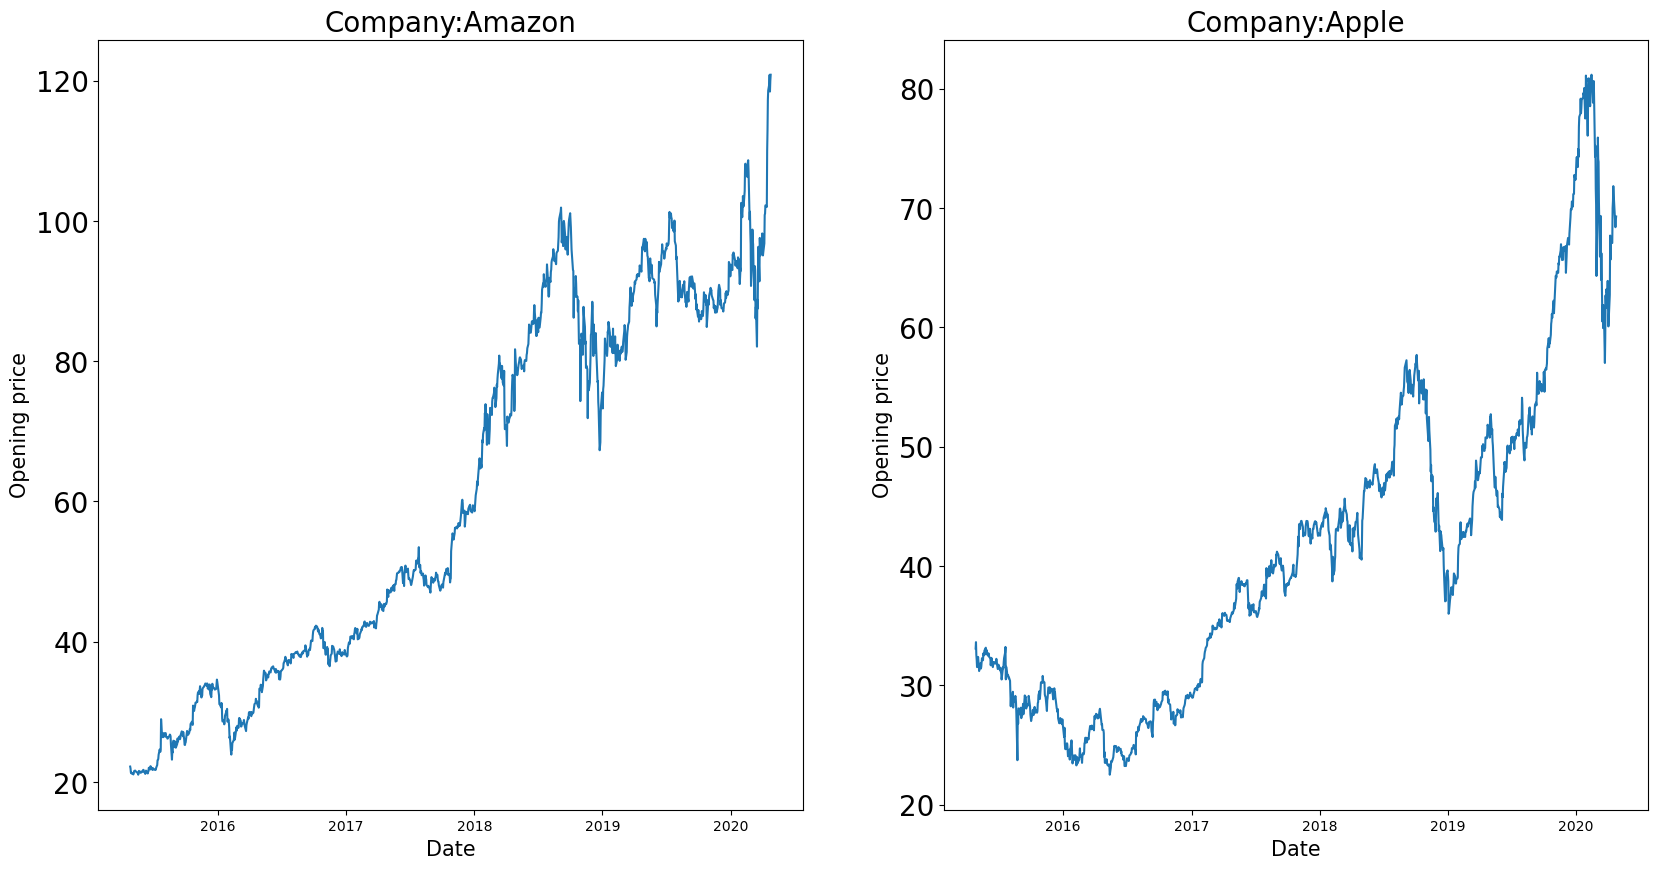

In [43]:
plt.figure(figsize = (20,10)) 
plt.subplot(1,2,1) 

plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Opening price',fontsize = 15)
plt.plot(data['Open']['AMZN'])
plt.subplot(1,2,2) 

plt.title('Company:Apple',fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Opening price',fontsize = 15)
plt.plot(data['Open']['AAPL'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

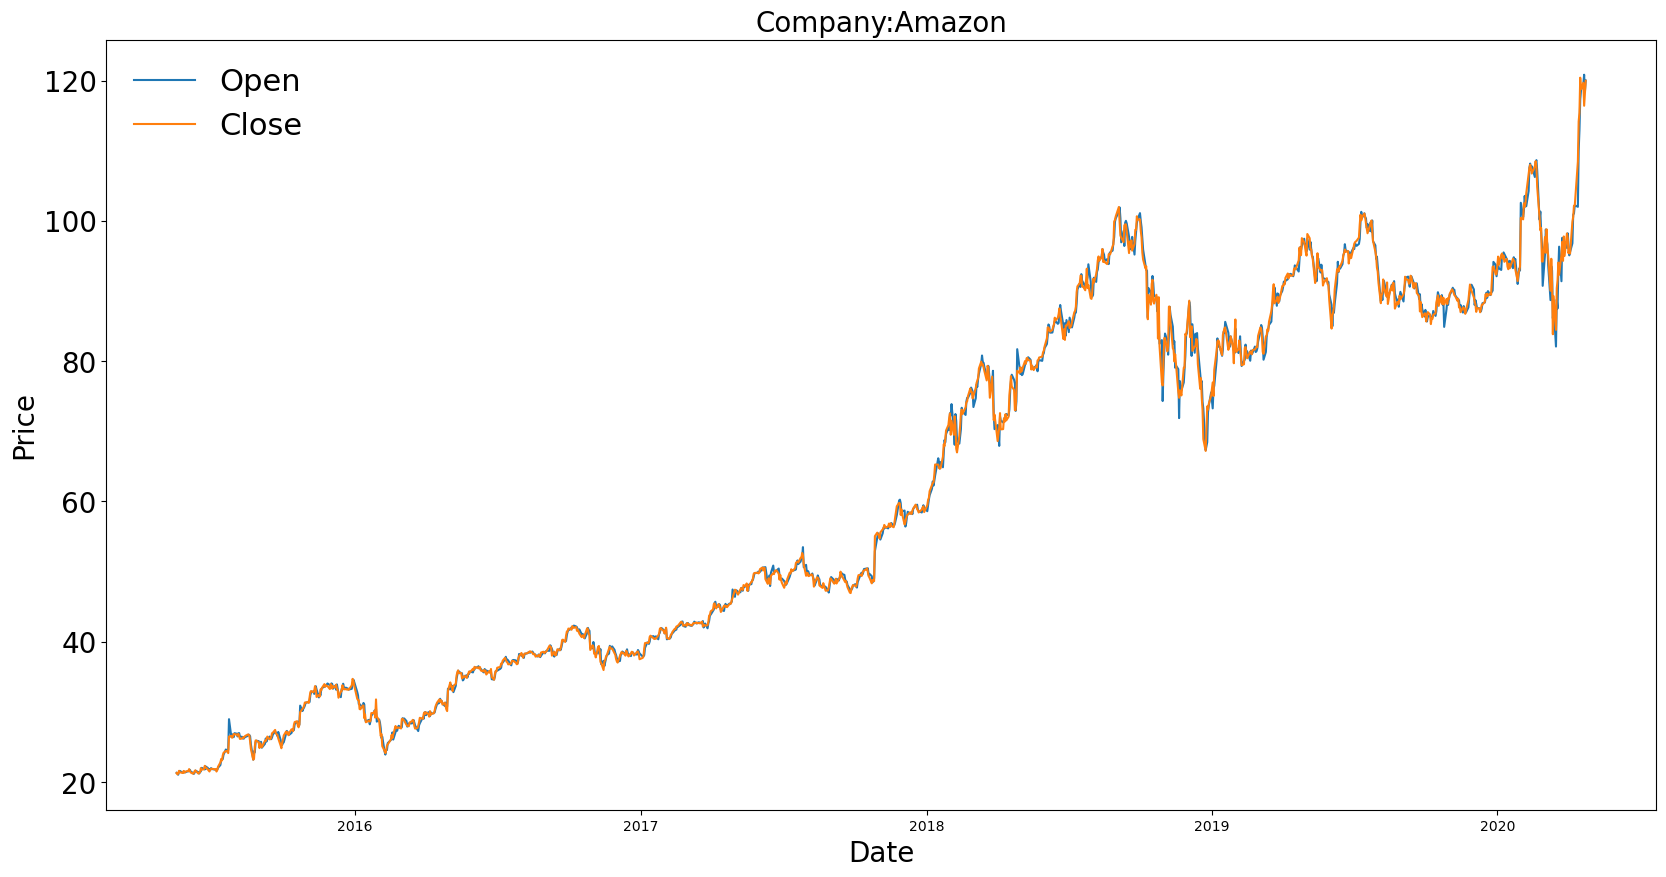

In [59]:
plt.figure(figsize = (20,10)) # Adjusting figure size
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Price',fontsize = 20)
plt.plot(data.iloc[15:-1]['Open']['AMZN'],label = 'Open') # Opening prices of first 30 days are plotted against date
plt.plot(data.iloc[15:-1]['Close']['AMZN'],label = 'Close') # Closing prices of first 30 days are plotted against date
plt.legend(loc='upper left', frameon=False,framealpha=1,prop={'size': 22}) # Properties of legend box

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

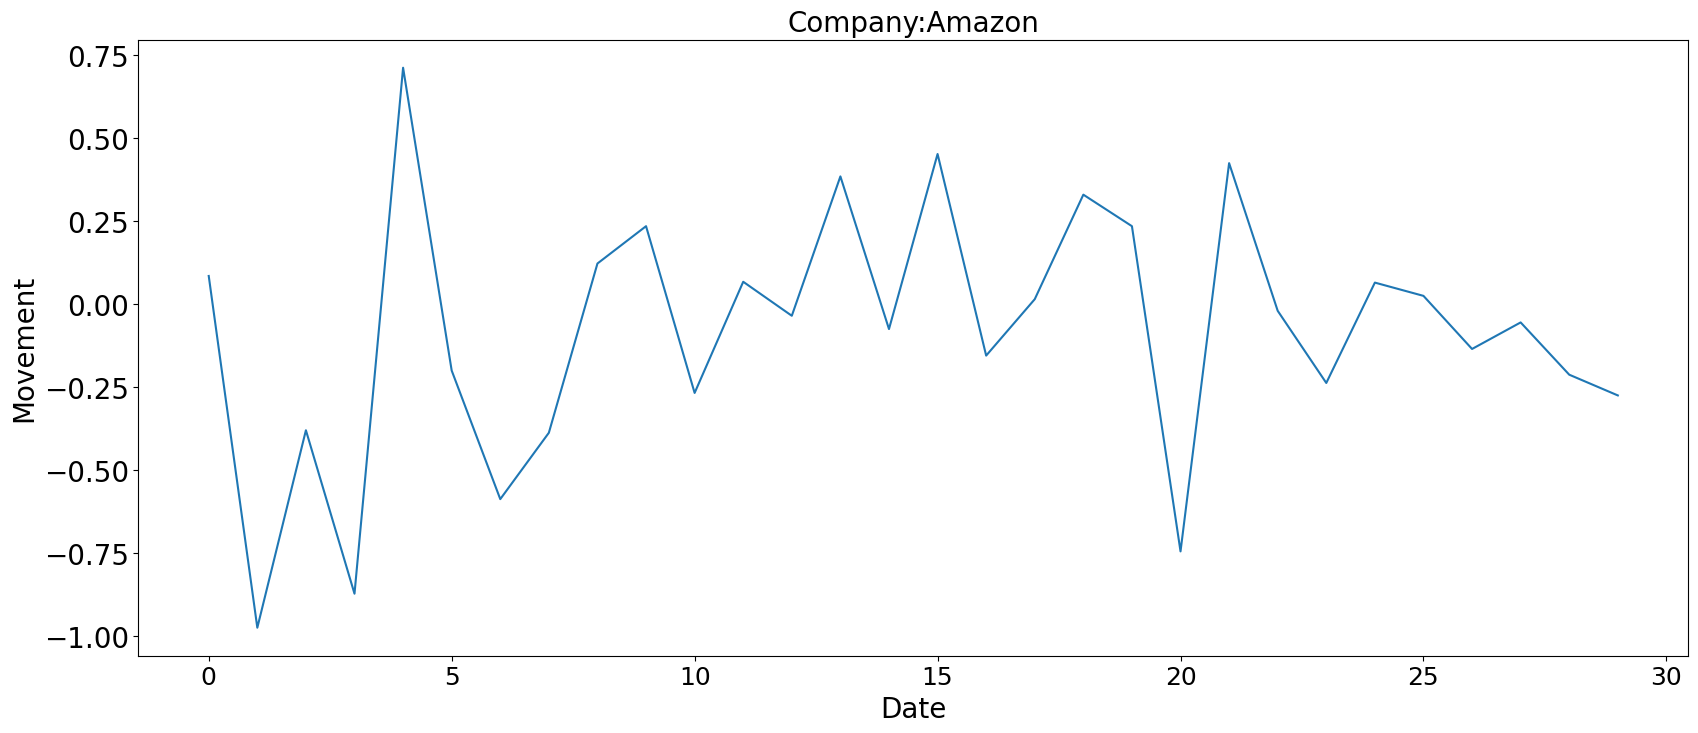

In [60]:
plt.figure(figsize = (20,8)) 
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Movement',fontsize = 20)
plt.plot(movements[0][0:30])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

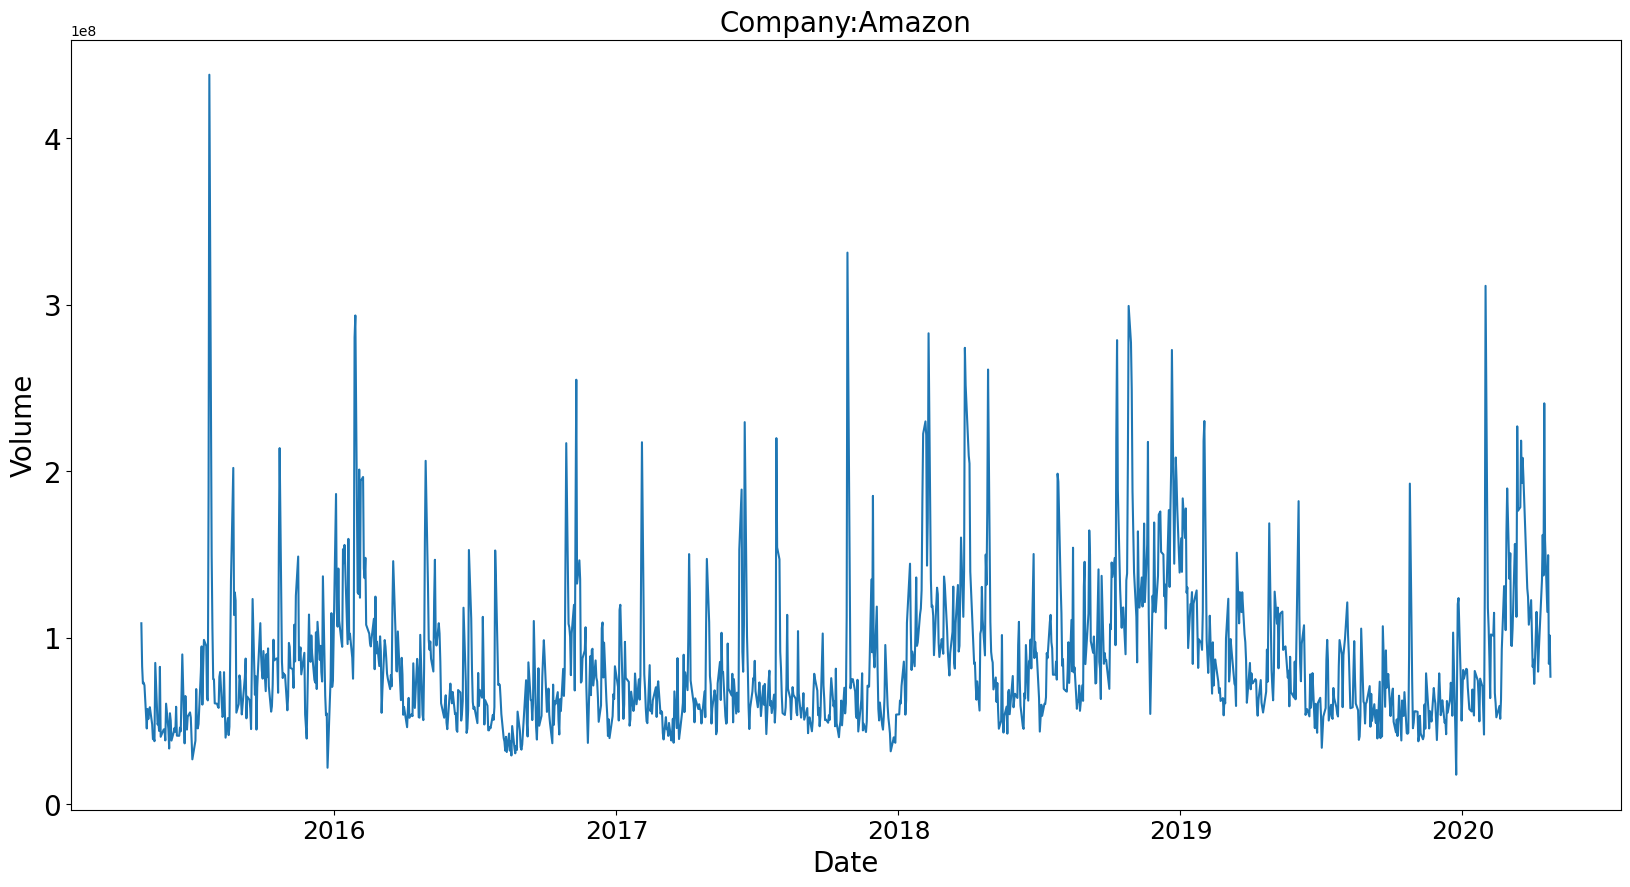

In [62]:
plt.figure(figsize = (20,10)) 
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Volume',fontsize = 20)
plt.plot(data['Volume']['AMZN'],label = 'Open')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

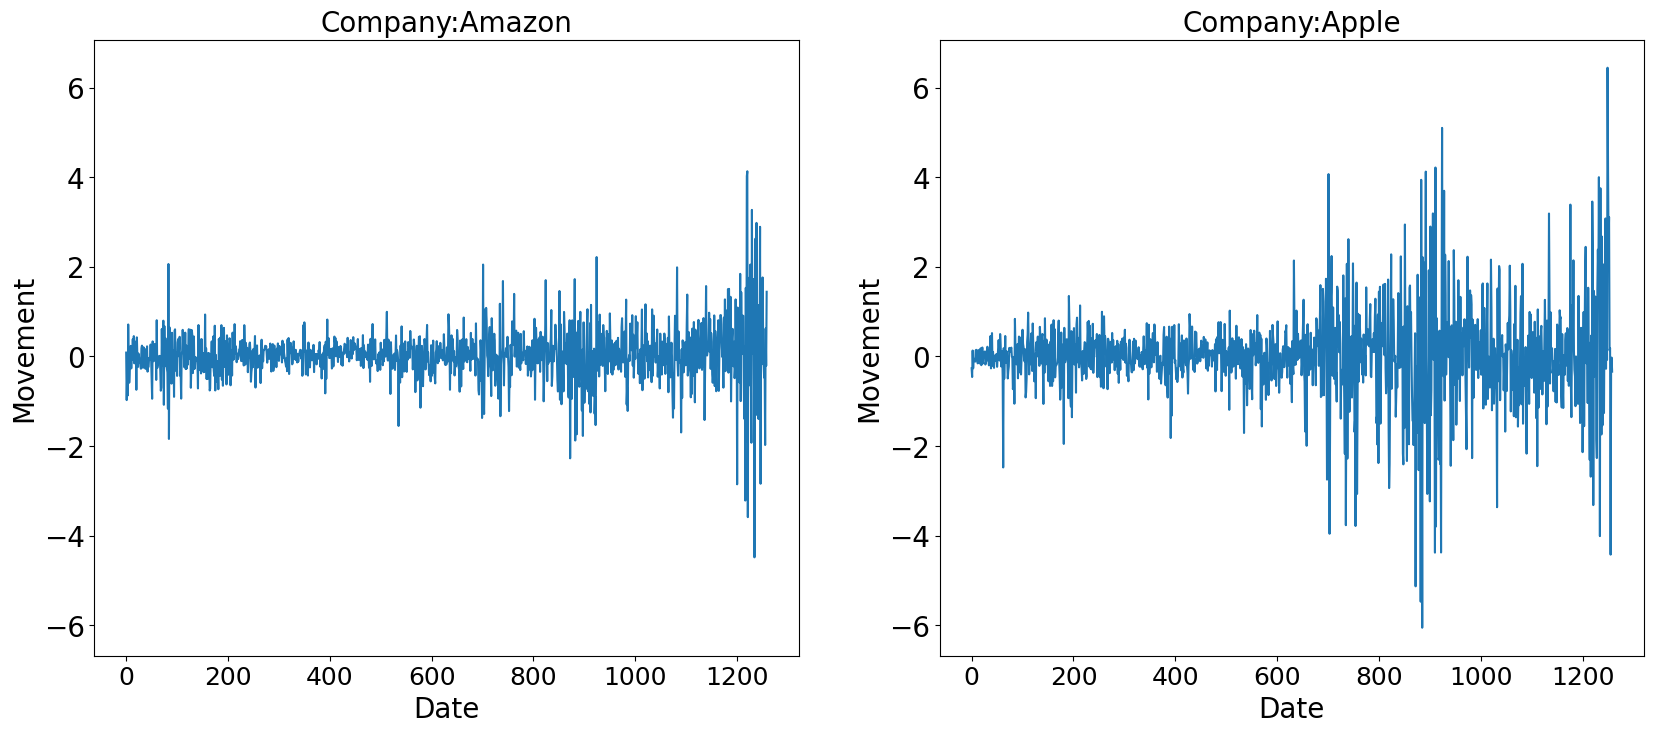

In [63]:
plt.figure(figsize = (20,8)) 
ax1 = plt.subplot(1,2,1)
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Movement',fontsize = 20)
plt.plot(movements[0]) 
plt.subplot(1,2,2,sharey = ax1)
plt.title('Company:Apple',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Movement',fontsize = 20)
plt.plot(movements[1])

In [64]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer() # Define a Normalizer
norm_movements = normalizer.fit_transform(movements) # Fit and transform

In [65]:
print(norm_movements.min())
print(norm_movements.max())
print(norm_movements.mean())

-0.33511277974477655
0.2655449656433241
-3.712317324404679e-05


In [66]:
# Import the necessary packages
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
# Define a normalizer
normalizer = Normalizer()
# Create Kmeans model
kmeans = KMeans(n_clusters = 10,max_iter = 1000)
# Make a pipeline chaining normalizer and kmeans
pipeline = make_pipeline(normalizer,kmeans)
# Fit pipeline to daily stock movements
pipeline.fit(movements)
predictions = pipeline.predict(movements)

In [67]:
predictions

array([2, 2, 2, 9, 3, 0, 3, 4, 3, 3, 2, 6, 6, 1, 2, 5, 2, 1, 6, 3, 2, 7,
       8, 0])

In [77]:
df1 = pd.DataFrame({'labels':labels,'companies':list(companies_dict)}).sort_values(by=['labels'],axis = 0)

<IPython.core.display.Javascript object>

NameError: name 'labels' is not defined

In [78]:
df1

,labels,companies
23,0,Bank of America
5,0,Lockheed Martin
17,1,Toyota
13,1,American Express
20,2,Chevron
16,2,Johnson & Johnson
14,2,Pepsi
10,2,MasterCard
0,2,Amazon
2,2,Walgreen


In [79]:

from sklearn.decomposition import PCA
# Define a normalizer
normalizer = Normalizer()
# Reduce the data
reduced_data = PCA(n_components = 2)
# Create Kmeans model
kmeans = KMeans(n_clusters = 10,max_iter = 1000)
# Make a pipeline chaining normalizer, pca and kmeans
pipeline = make_pipeline(normalizer,reduced_data,kmeans)
# Fit pipeline to daily stock movements
pipeline.fit(movements)
# Prediction
predictions = pipeline.predict(movements)
# Create dataframe to store companies and predicted labels
df2 = pd.DataFrame({'labels':labels,'companies':list(companies_dict.keys())}).sort_values(by=['labels'],axis = 0)

<IPython.core.display.Javascript object>

NameError: name 'labels' is not defined

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

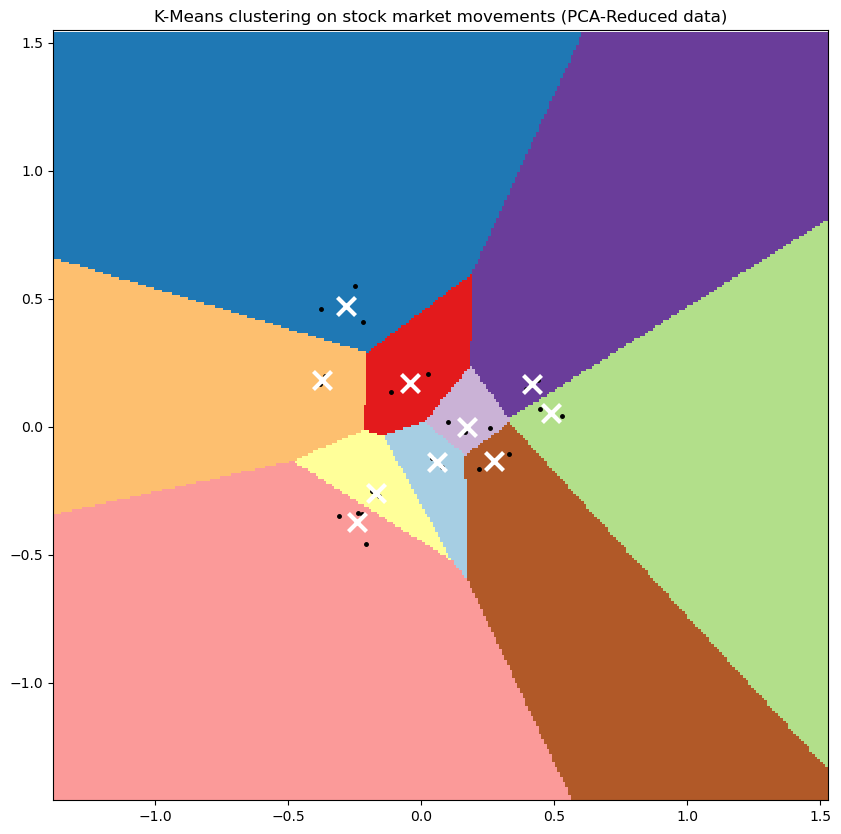

In [80]:
from sklearn.decomposition import PCA
# Reduce the data
reduced_data = PCA(n_components = 2).fit_transform(norm_movements)
# Define step size of mesh
h = 0.01
# Plot the decision boundary
x_min,x_max = reduced_data[:,0].min()-1, reduced_data[:,0].max() + 1
y_min,y_max = reduced_data[:,1].min()-1, reduced_data[:,1].max() + 1
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
# Obtain labels for each point in the mesh using our trained model
Z = kmeans.predict(np.c_[xx.ravel(),yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
# Define color plot
cmap = plt.cm.Paired
# Plotting figure
plt.clf()
plt.figure(figsize=(10,10))
plt.imshow(Z,interpolation = 'nearest',extent=(xx.min(),xx.max(),yy.min(),yy.max()),cmap = cmap,aspect = 'auto',origin = 'lower')
plt.plot(reduced_data[:,0],reduced_data[:,1],'k.',markersize = 5)
# Plot the centroid of each cluster as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1],marker = 'x',s = 169,linewidths = 3,color = 'w',zorder = 10)
plt.title('K-Means clustering on stock market movements (PCA-Reduced data)')
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.show()